In [0]:


x = "Hello World!"
print (x)



Hello World!


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:


x = np.linspace(0, 10*np.pi, 1000)
y = np.sin(x)



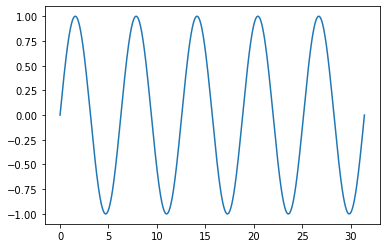

In [0]:


plt.plot(x, y)



In [0]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

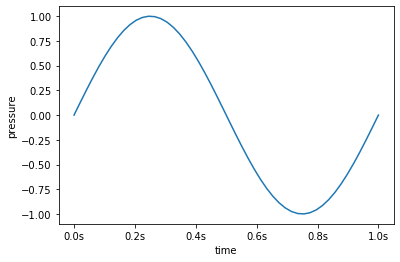

In [0]:


t = np.linspace(0, 1)
y = np.sin(2*np.pi*t)
ax = plt.subplot()
ax.plot(t,y)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');



Text(0.5, 1.0, '40 oscillations per second (frequency of 40 Hz)')

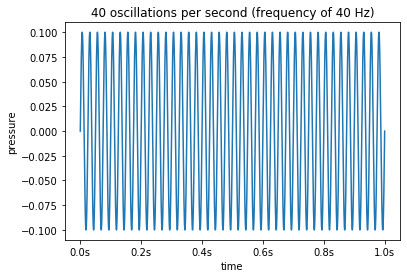

In [0]:


t = np.linspace(0, 1, 16000)
freq = 40
y = 0.1*np.sin(2*np.pi*t*freq)
ax = plt.subplot()
ax.plot(t,y)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');
plt.title(f'{freq} oscillations per second (frequency of {freq} Hz)')



In [0]:
ipd.Audio(y, rate=16000)

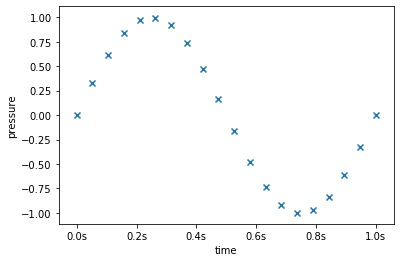

In [0]:
t = np.linspace(0, 1, num=20)
y = np.sin(2*np.pi*t)
ax = plt.subplot()
ax.scatter(t, y, marker='x')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');

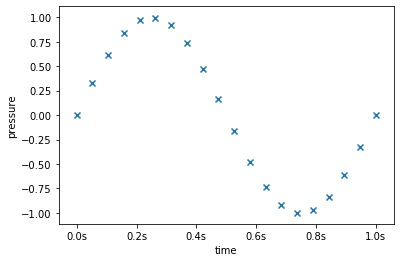

In [0]:
t = np.linspace(0, 1, num=20)
y = np.sin(2*np.pi*t*20)
ax = plt.subplot()
ax.scatter(t, y, marker='x')
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2}s")) # https://docs.python.org/3/library/functions.html#format
plt.ylabel('pressure');
plt.xlabel('time');

In [0]:
%matplotlib inline

import numpy as np, matplotlib.pyplot as plt, matplotlib.ticker as ticker, IPython.display as ipd
import librosa, librosa.display

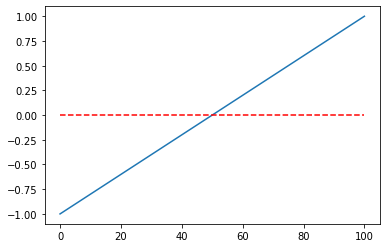

In [0]:
t = np.linspace(0, 100, num=100)
support = (t - 50) / 50
ax = plt.subplot()
ax.plot(t, support)
ax.plot(t, [0]*100, 'r--')

In [0]:
sr = 16000
decay = 0.95

signal = support

for i in range(sr // 100 - 1):
    signal = np.hstack((signal, support * decay**i))

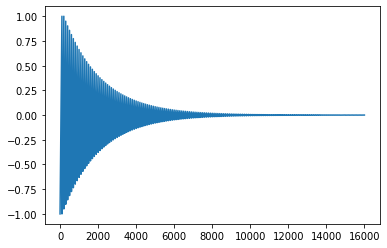

In [0]:


plt.plot(signal)



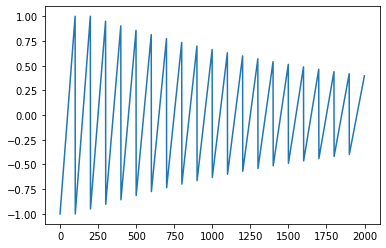

In [0]:
plt.plot(signal[:2000])

In [0]:


ipd.Audio(signal, rate=16000)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

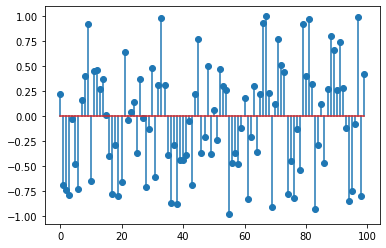

In [0]:


support = np.random.rand(100) * 2 - 1
plt.stem(support, markerfmt='o', bottom=0)



In [0]:
sr = 16000
decay = 0.9

signal = support

for i in range(sr // 100 - 1):
    signal = np.hstack((signal, support * decay**i))

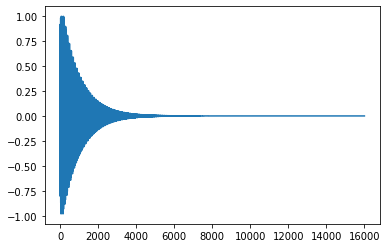

In [0]:
plt.plot(signal)

In [0]:


ipd.Audio(signal, rate=16000)



In [0]:
#fungsi sinc
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    w is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

IntSlider(value=0)

Button(description='update plot', style=ButtonStyle())

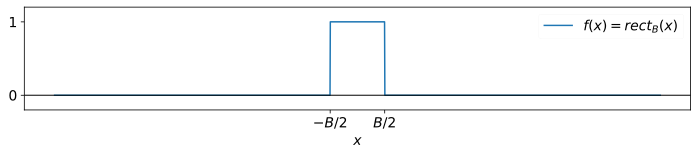

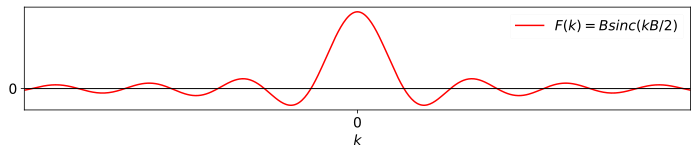

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
from IPython import display as disp

import ipywidgets as widgets
from IPython.display import display
slide = widgets.IntSlider()
display(slide)

from IPython.display import display
button = widgets.Button(description="update plot")
display(button)

pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

def on_button_clicked(b):
    """
    excecutes function when button is clicked
    """
    B = slide.value * 10
    if B == 0:
        B = 10
    plt.rcParams.update({'font.size': 14})
    plt.rcParams['figure.figsize'] = (12, 1.9)
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*B/length, 1*B/length], ['$-B/2$', '$B/2$'])
    plt.plot(x, rect(len(x), B), label=r'$f(x)=rect_B(x)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$x$')
    plt.ylim(-0.2, 1.2)
    plt.show()
    
    plt.yticks([0, 1], ['$0$', '$1$'])
    plt.xticks([-1*pi, 0, 1*pi], ['$-B/2$', '$0$', '$B/2$'])

    k = np.linspace(-1, 1, length)
    plt.plot(x, (B / length) * np.sin(k * B / 2) / (B * k / 2), 'r', label=r'$F(k)=B sinc(kB/2)$')
    plt.axhline(0, color='black', lw=1)
    leg = plt.legend(loc='best', fontsize=14, fancybox=True)
    leg.get_frame().set_linewidth(0.1)
    plt.xlabel('$k$')
    plt.xlim(-.25, .25)
    plt.show()
    disp.clear_output(wait=True)
 
button.on_click(on_button_clicked)

In [0]:
#TRANSFORMASI FOURIER
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

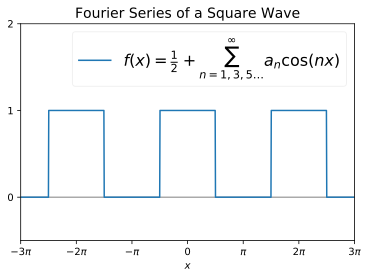

In [0]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

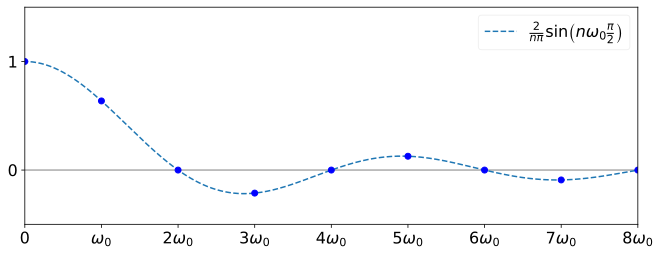

In [0]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

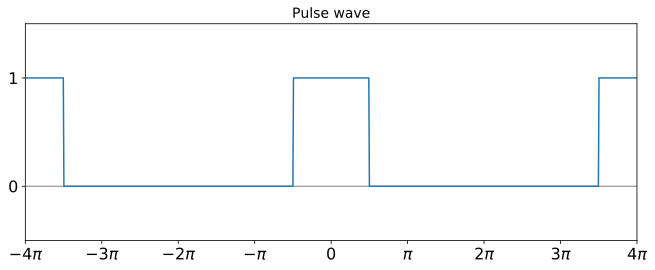

In [0]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

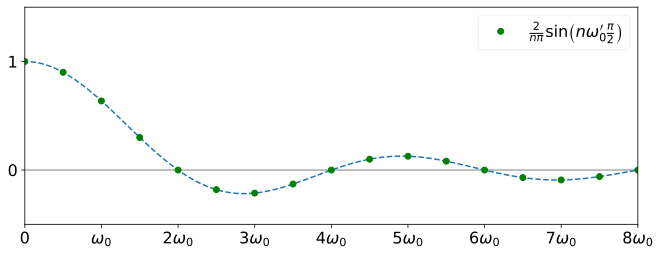

In [0]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

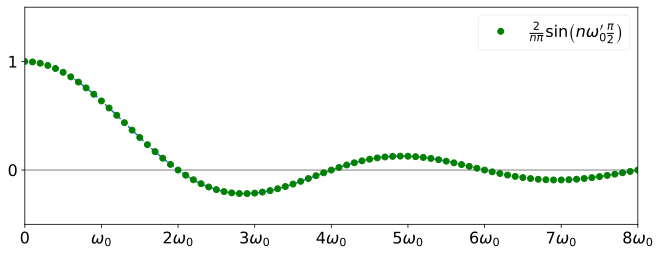

In [0]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
n = 0.1
nprime = np.arange(n, 10, n)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

In [0]:
#DFT
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
%matplotlib inline
sns.set_style("white")

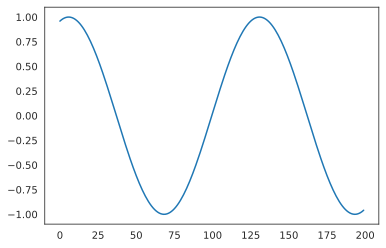

In [0]:
n_grid=200
x=np.linspace(-5,5,n_grid)
y=np.sin(x)
plt.plot(y)

In [0]:


h=x[1]-x[0]
D=-np.eye(n_grid)+np.diagflat(np.ones(n_grid-1),1)
D = D / h



In [0]:
D2=D.dot(-D.T)
D2[-1,-1]=D2[0,0]

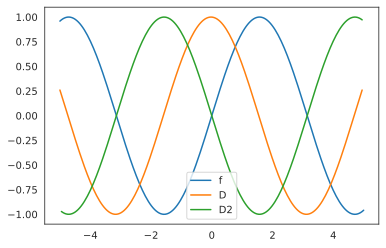

In [58]:
plt.plot(x,y, label="f")
plt.plot(x[:-1],D.dot(y)[:-1], label="D")
plt.plot(x[1:-1],D2.dot(y)[1:-1], label="D2")
plt.legend()

In [0]:
eig_non, psi_non=np.linalg.eigh(-D2/2)

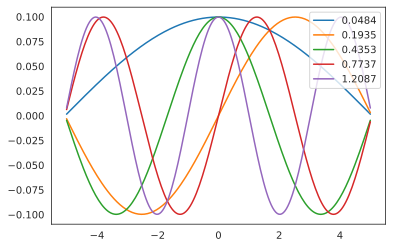

In [60]:


for i in range(5):
    plt.plot(x,psi_non[:,i], label=f"{eig_non[i]:.4f}")
    plt.legend(loc=1)



In [0]:
X=np.diagflat(x*x)

In [0]:
eig_harm, psi_harm = np.linalg.eigh(-D2/2+X)

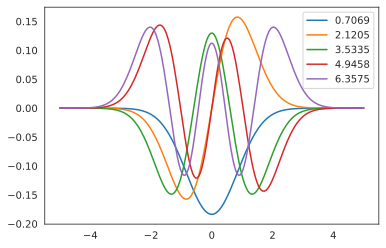

In [63]:
for i in range(5):
    plt.plot(x,psi_harm[:,i], label=f"{eig_harm[i]:.4f}")
    plt.legend(loc=1)

In [0]:
w=np.full_like(x,1e10)
w[np.logical_and(x>-2,x<2)]=0.
eig_well, psi_well= np.linalg.eigh(-D2/2+np.diagflat(w))

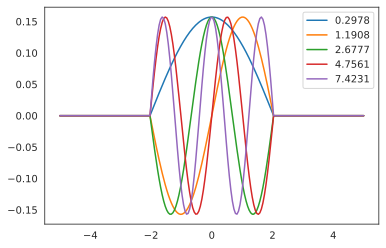

In [65]:
for i in range(5):
    plt.plot(x,psi_well[:,i], label=f"{eig_well[i]:.4f}")
    plt.legend(loc=1)

In [0]:
# integral
def integral(x,y,axis=0):
    dx=x[1]-x[0]
    return np.sum(y*dx, axis=axis)

In [0]:


num_electron=17



In [0]:
def get_nx(num_electron, psi, x):
    
    I=integral(x,psi**2,axis=0)
    normed_psi=psi/np.sqrt(I)[None, :]
    
    # occupation num
    fn=[2 for _ in range(num_electron//2)]
    if num_electron % 2:
        fn.append(1)

    # density
    res=np.zeros_like(normed_psi[:,0])
    for ne, psi  in zip(fn,normed_psi.T):
        res += ne*(psi**2)
    return res

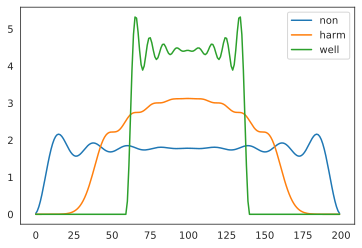

In [70]:
plt.plot(get_nx(num_electron,psi_non, x), label="non")
plt.plot(get_nx(num_electron,psi_harm, x), label="harm")
plt.plot(get_nx(num_electron,psi_well, x), label="well")
plt.legend(loc=1)

In [0]:
def get_exchange(nx,x):
    energy=-3./4.*(3./np.pi)**(1./3.)*integral(x,nx**(4./3.))
    potential=-(3./np.pi)**(1./3.)*nx**(1./3.)
    return energy, potential

In [0]:


def get_hatree(nx,x, eps=1e-1):
    h=x[1]-x[0]
    energy=np.sum(nx[None,:]*nx[:,None]*h**2/np.sqrt((x[None,:]-x[:,None])**2+eps)/2)
    potential=np.sum(nx[None,:]*h/np.sqrt((x[None,:]-x[:,None])**2+eps),axis=-1)
    return energy, potential



In [0]:
def print_log(i,log):
    print(f"step: {i:<5} energy: {log['energy'][-1]:<10.4f} energy_diff: {log['energy_diff'][-1]:.10f}")

In [0]:
max_iter=1000
energy_tolerance=1e-8
log={"energy":[float("inf")], "energy_diff":[float("inf")]}

In [75]:
nx=np.zeros(n_grid)
for i in range(max_iter):
    ex_energy, ex_potential=get_exchange(nx,x)
    ha_energy, ha_potential=get_hatree(nx,x)
    
    # Hamiltonian
    H=-D2/2+np.diagflat(ex_potential+ha_potential+x*x)
    
    energy, psi= np.linalg.eigh(H)
    
    # log
    log["energy"].append(energy[0])
    energy_diff=energy[0]-log["energy"][-2]
    log["energy_diff"].append(energy_diff)
    print_log(i,log)
    
    # convergence
    if abs(energy_diff) < energy_tolerance:
        print("converged!")
        break
    
    # update density
    nx=get_nx(num_electron,psi,x)
else:
    print("not converged")

step: 0     energy: 0.7069     energy_diff: -inf
step: 1     energy: 16.3625    energy_diff: 15.6555321919
step: 2     energy: 13.8021    energy_diff: -2.5603559494
step: 3     energy: 15.3002    energy_diff: 1.4980525863
step: 4     energy: 14.4119    energy_diff: -0.8882287680
step: 5     energy: 14.9470    energy_diff: 0.5350438262
step: 6     energy: 14.6242    energy_diff: -0.3228271880
step: 7     energy: 14.8201    energy_diff: 0.1959328656
step: 8     energy: 14.7011    energy_diff: -0.1190355457
step: 9     energy: 14.7735    energy_diff: 0.0724651058
step: 10    energy: 14.7294    energy_diff: -0.0441312736
step: 11    energy: 14.7563    energy_diff: 0.0268946713
step: 12    energy: 14.7399    energy_diff: -0.0163922405
step: 13    energy: 14.7499    energy_diff: 0.0099933983
step: 14    energy: 14.7438    energy_diff: -0.0060926001
step: 15    energy: 14.7475    energy_diff: 0.0037147279
step: 16    energy: 14.7452    energy_diff: -0.0022649307
step: 17    energy: 14.7466   

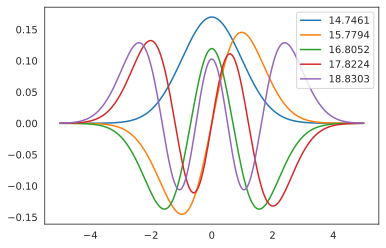

In [76]:
for i in range(5):
    plt.plot(x,psi[:,i], label=f"{energy[i]:.4f}")
    plt.legend(loc=1)

In [0]:
#DFT
import numpy as np
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline

In [0]:
def gen_wave(freq, amp, T, shift, sr):
    time = np.arange(0, T, T/sr)
    X = amp * np.sin(2*np.pi*freq*time+shift)
    return time, X

In [0]:
N = 100

In [0]:
time, amplitude = gen_wave(2, 3, 1, 0, N)

In [0]:
_, amplitude2 = gen_wave(5, 2, 1, 0, N)

In [0]:
amplitude3 = amplitude + amplitude2

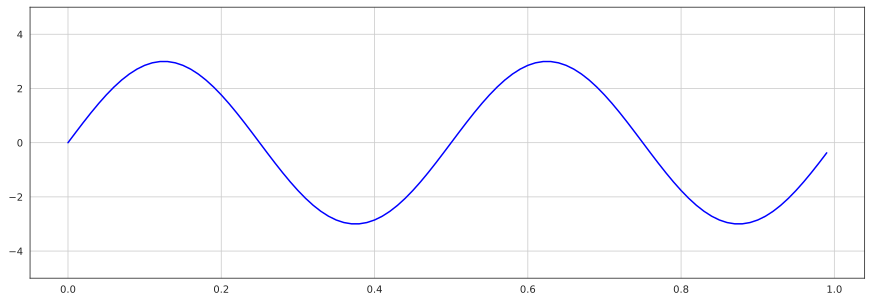

In [85]:
plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude, c="b")

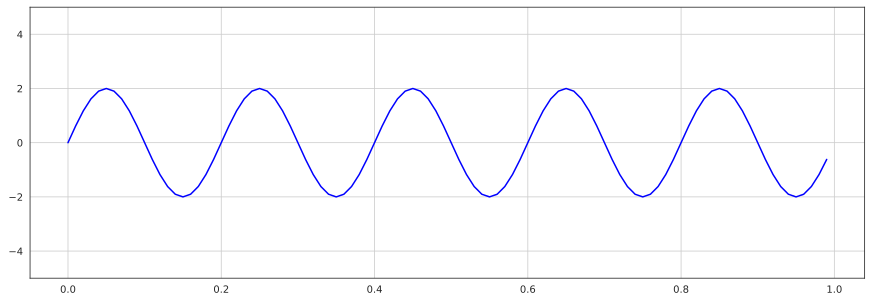

In [86]:


plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude2, c="b")



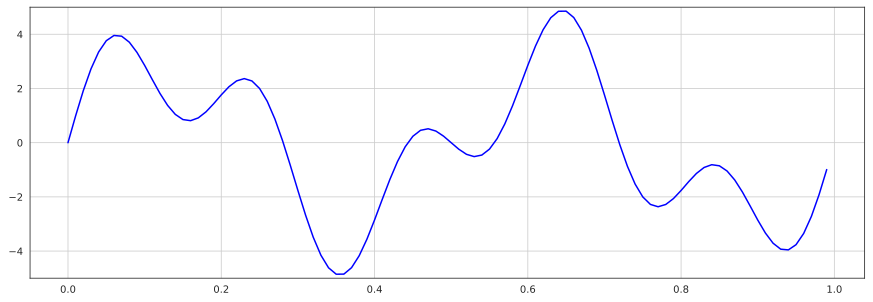

In [87]:


plt.figure(figsize=[15, 5])
plt.ylim([-5, 5])
plt.grid(True, which='both')
plt.plot(time, amplitude3, c="b")



In [0]:


#vetor indice
k = np.arange(0, N)
n = np.arange(0, N)



In [0]:
k = k.reshape((N,1))

In [90]:
M = 2 * np.pi * k * n / N
Xa = np.cos(M)
Xb = 1j * np.sin(M)
X = Xa - Xb
print(X.shape)
Y = X.dot(amplitude3)
print(Y.shape)

(100, 100)
(100,)


In [91]:


#plt.plot(n, result)
Y.real



array([-2.30926389e-14,  2.17094316e-14, -1.37798322e-14, -5.58398083e-14,
        5.40115256e-14,  6.67896631e-14, -1.42715624e-14, -3.71138946e-14,
       -1.07417322e-13, -3.02026644e-14, -3.08406921e-14, -5.56823299e-14,
        2.65672154e-14, -2.60671880e-14, -3.05319809e-14, -4.22707713e-15,
        5.57959571e-14,  1.53124714e-13,  1.54074650e-14,  6.95431110e-14,
        1.51534393e-13, -9.36742312e-14,  2.16995049e-14,  3.08240491e-14,
       -9.21395195e-14,  3.43261205e-14,  6.75801009e-14, -2.66443173e-14,
       -2.17888619e-14,  5.66181705e-14,  1.89840491e-14, -1.44026728e-13,
       -1.01580551e-13,  6.24838845e-14, -4.35595185e-14,  3.71053173e-14,
       -5.08062790e-14, -1.27442143e-13, -3.78636858e-14, -1.45613507e-13,
       -2.31667731e-13, -6.34908258e-15,  1.85673083e-13,  2.96601380e-14,
        3.28856772e-13,  1.32042512e-13,  6.45423938e-14, -1.16368681e-13,
       -2.61510656e-13,  7.31886803e-14, -8.88178420e-15,  1.76798069e-13,
       -2.50069279e-13, -

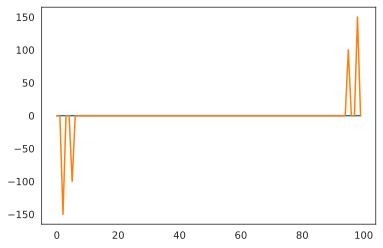

In [92]:
plt.plot(k, Y.real, k, Y.imag)

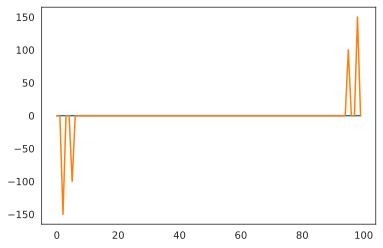

In [93]:
gabarito = np.fft.fft(amplitude3, N)
#freqgab = np.fft.fftfreq(N)
plt.plot(k, gabarito.real, k, gabarito.imag)

In [94]:
np.allclose(Y.real, gabarito.real)

True

In [0]:
#FFT


%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt



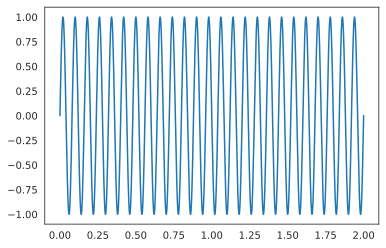

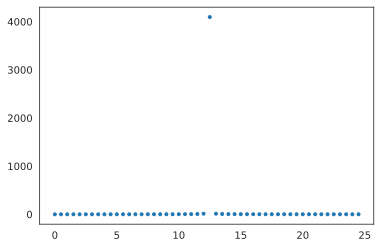

In [96]:
f = 12.5
n = 2**13
t = 2
x = np.linspace(0, t, n)
y = np.sin(2*np.pi*f*x)
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:50], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:50],'.');

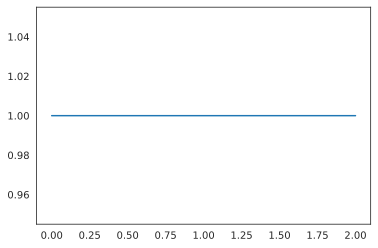

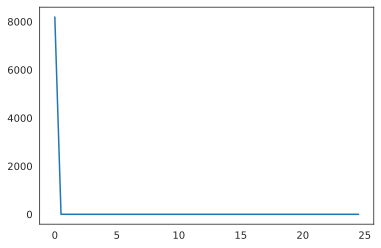

In [97]:
f = 12.5
n = 2**13
t = 2
x = np.linspace(0, t, n)
y = np.ones(n)
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:50], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:50]);

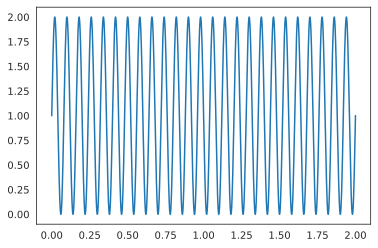

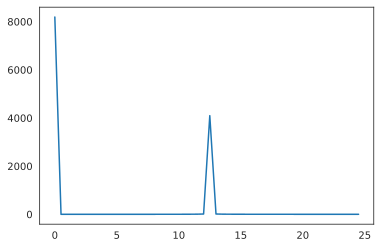

In [98]:
f = 12.5
n = 2**13
t = 2
x = np.linspace(0, t, n)
y = np.sin(2*np.pi*f*x)+1
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:50], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:50]);

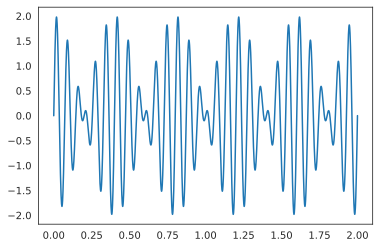

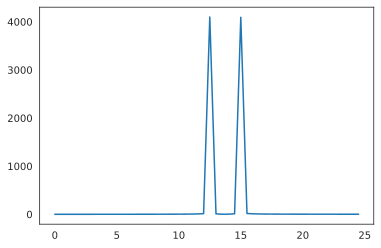

In [99]:
f1 = 12.5
f2 = 15
n = 2**13
t = 2
x = np.linspace(0, t, n)
y = np.sin(2*np.pi*f1*x)+np.sin(2*np.pi*f2*x)
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:50], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:50]);

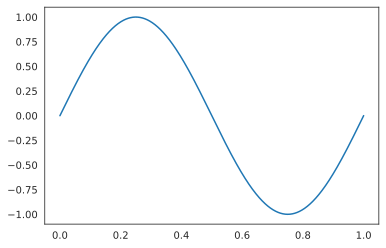

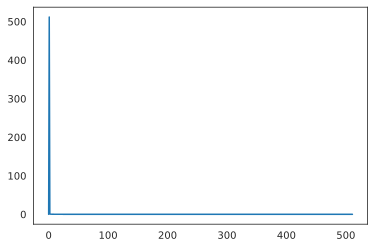

In [100]:
f = 2**10
n = 2**10
t = 1
x = np.linspace(0, t, n)
y = np.sin(2*np.pi*f*x)
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:n//2], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:n//2]);

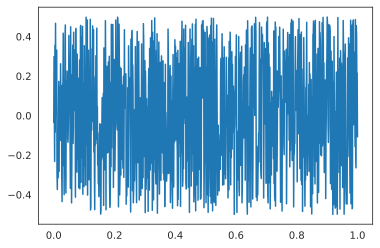

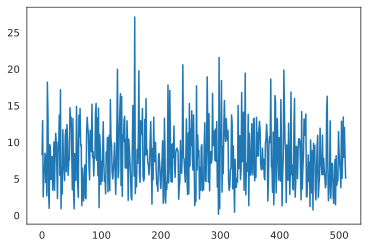

In [101]:
n = 2**10
t = 1
x = np.linspace(0, t, n)
y = np.random.random(n)-0.5
plt.plot(x,y);
plt.show()

y_fft = np.fft.fft(y)
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:n//2], np.sqrt(np.real(np.conj(y_fft)*y_fft))[:n//2]);

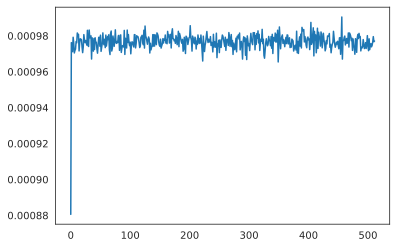

In [102]:
n = 2**10
t = 1
x = np.linspace(0, t, n)
p = np.zeros(n)

for i in range(20000):
    y = np.random.random(n)-0.5
    y_fft = np.fft.fft(y)
    p += np.sqrt(np.real(np.conj(y_fft)*y_fft))
p/=i

p /= p.sum()

freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:n//2], p[:n//2]);

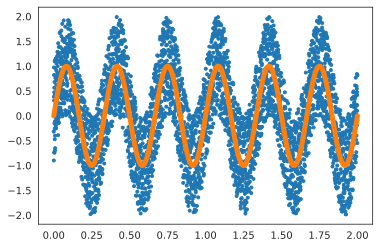

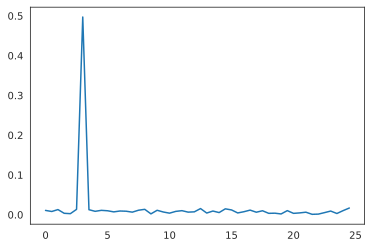

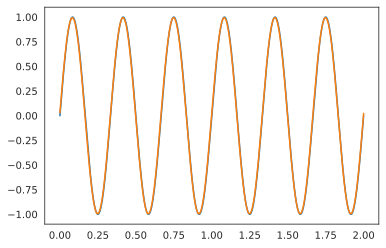

In [103]:
f = 3
n = 2**12
t = 2
x = np.linspace(0, t, n)

y = np.sin(2*np.pi*f*x)
y_noise = y+(2*np.random.random(n)-1)

plt.plot(x,y_noise,'.');
plt.plot(x,y,linewidth=5);
plt.show()

y_fft = np.fft.fft(y_noise)/n
r = np.sqrt(np.real(np.conj(y_fft)*y_fft))
freq = np.fft.fftfreq(n,t/n)
plt.plot(freq[:50], r[:50]);
plt.show()

y_fft[r<0.1] = 0

y_ = np.fft.ifft(y_fft)*n

plt.plot(x,np.real(np.sin(2*np.pi*f*x)));
plt.plot(x,np.real(y_));